Decision Tree Classifier report with test size of 60.0%
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2511
           1       1.00      1.00      1.00      2364

    accuracy                           1.00      4875
   macro avg       1.00      1.00      1.00      4875
weighted avg       1.00      1.00      1.00      4875

Decision Tree Classifier report with test size of 40.0%
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1692
           1       1.00      1.00      1.00      1558

    accuracy                           1.00      3250
   macro avg       1.00      1.00      1.00      3250
weighted avg       1.00      1.00      1.00      3250

Decision Tree Classifier report with test size of 20.0%
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       839
           1       1.00      1.00      1.00       786

    accurac

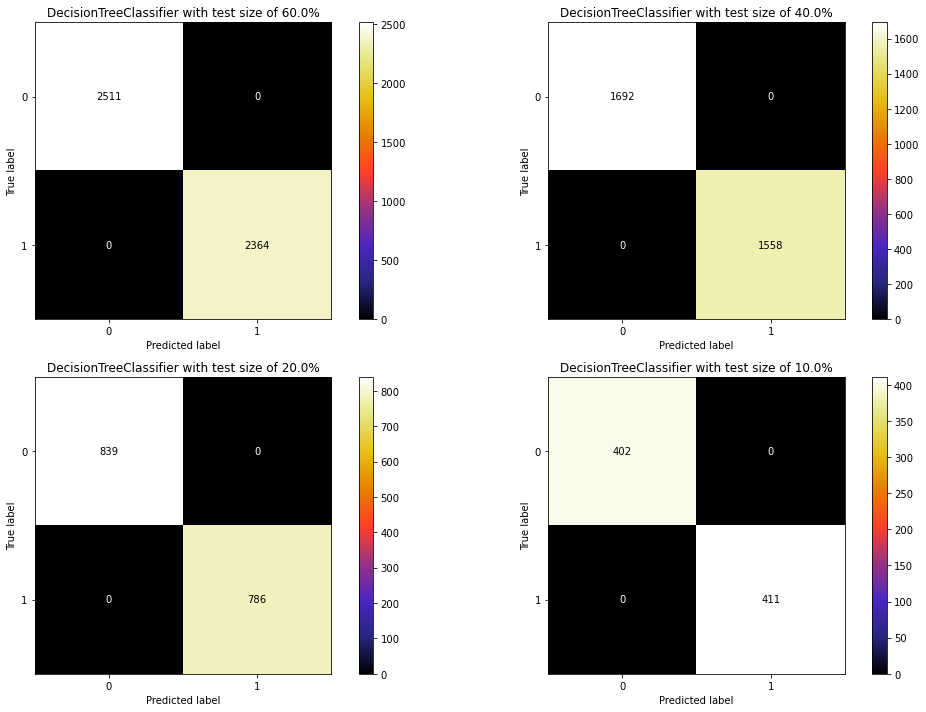

Table Accuracy with depth of DesicionTree
max_depth	accuracy_score
None		1.0
2		0.9156923076923077
3		0.9495384615384616
4		0.9538461538461539
5		0.9784615384615385
6		0.9901538461538462
7		1.0


In [133]:
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix

def split_data(X, Y, size):
    # Split data to train, test set
    X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = size)
    return X_train, X_test,Y_train,Y_test

def train_model(size, X_dummy, Y_dummy, depth=None):
    # Split data to train, test set
    X_train, X_test,Y_train,Y_test = split_data(X_dummy, Y_dummy, size)
    # Fit model with Information Gain
    if depth is not None:
        clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth=depth)
    else:
        clf = DecisionTreeClassifier(random_state=42, criterion='entropy')
    # Next, train a default decision tree using the training sets
    clf = clf.fit(X_train, Y_train)
    # Lastly, return the test sets and the trained model
    return (X_test, Y_test, clf)

def plot_graphviz(clf):
    # Plot DecisionTree use graphviz
    dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = graphviz.Source(dot_data)  
    graph.view()

def get_classification_report(y_pred, Y_test, size): 
    print(f'Decision Tree Classifier report with test size of {size*100}%\n', classification_report(Y_test, y_pred))

def plot_multi_confusion_matrix(classifiers, dataset, test_size):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    for cls, ax, data, size in zip(classifiers, axes.flatten(), dataset, test_size):
        title = type(cls).__name__ + f' with test size of {size*100}%'
        plot_confusion_matrix(cls, 
                              data[0], 
                              data[1], 
                              ax=ax, 
                              cmap="CMRmap"
                             )
        ax.title.set_text(title)
    plt.tight_layout()  
    plt.show()
    
def main():
    # Read data into DataFrame
    df = pd.read_csv('mushrooms.csv', sep=',')
    
    # LabelEncoder to transfer to ordinal
    labelencoder=LabelEncoder()
    for column in df.columns:
        df[column] = labelencoder.fit_transform(df[column])

    # Get feature and target
    X = df.iloc[:,1:]
    Y = df.iloc[:,0]
    X_dummy = np.array(X)
    Y_dummy = np.array(Y)

    # Percentage train/test size
    test_size = [0.6, 0.4, 0.2, 0.1]
    
    # Zip Classifier and data to plot multiple confusion matrix
    classifiers = []
    dataset = []
    
    for size in test_size:
    # Train DecisionTree model
        # Train model
        X_test, Y_test, clf = train_model(size, X_dummy, Y_dummy)
        
        # Append to list
        dataset.append([X_test, Y_test])
        classifiers.append(clf)
        
        # Plot graphviz
        plot_graphviz(clf)
        
        # Predict target use model
        y_pred=clf.predict(X_test)
        
        # Get classification report
        get_classification_report(y_pred, Y_test, size)
        
    # Get confusion matrix
    plot_multi_confusion_matrix(classifiers, dataset, test_size)

def depth_accuracy():
    # Read data into DataFrame
    df = pd.read_csv('mushrooms.csv', sep=',')
    
    # LabelEncoder to transfer to ordinal
    labelencoder=LabelEncoder()
    for column in df.columns:
        df[column] = labelencoder.fit_transform(df[column])

    # Get feature and target
    X = df.iloc[:,1:]
    Y = df.iloc[:,0]
    X_dummy = np.array(X)
    Y_dummy = np.array(Y)
    
    # Percentage train/test size
    test_size = 0.2
    
    # Max Depth of DecisionTree
    max_depth = [None, 2, 3, 4, 5, 6, 7]
    
    # Result of accuracy
    result = {}
    
    for depth in max_depth:
        # Train model
        X_test, Y_test, clf = train_model(test_size, X_dummy, Y_dummy, depth)
    
        # Plot graphviz
        plot_graphviz(clf)

        # Calculate accuracy test set use model
        score=clf.score(X_test, Y_test)
        
        # Append score to result
        result[depth] = score
        
    print('Table Accuracy with depth of DesicionTree')
    print('max_depth\taccuracy_score')
    for key in result:
        print(f'{key}\t\t{result[key]}')
    
main()
depth_accuracy()